# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Final Project

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import operator
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from group_lasso import GroupLasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

## Data Processing

In [3]:
data_types = pd.read_csv('data/data_types.csv', index_col=0)['0'].to_dict()
df = pd.read_csv('data/energy_cleaned.csv', dtype=data_types)
df.head()

,total_consumption,in.sqft,"in.hvac_heating_efficiency / ASHP, SEER 13, 7.7 HSPF","in.hvac_heating_efficiency / ASHP, SEER 15, 8.5 HSPF","in.hvac_heating_efficiency / Electric Baseboard, 100% Efficiency","in.hvac_heating_efficiency / Electric Boiler, 100% AFUE","in.hvac_heating_efficiency / Electric Furnace, 100% AFUE","in.hvac_heating_efficiency / Electric Wall Furnace, 100% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 76% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 80% AFUE",...,in.water_heater_in_unit / Yes,in.bedrooms,in.cooling_setpoint,in.geometry_stories,in.geometry_stories_low_rise,in.heating_setpoint,in.infiltration,in.occupants,in.pv_system_size,in.plug_loads
0,19910.662354,1690,0,0,0,0,0,0,0,0,...,1,3,78,2,2,68,7,2,0,106
1,53572.219312,1690,0,0,0,0,0,0,0,0,...,1,3,75,1,1,70,25,2,0,91
2,10565.212074,2176,0,0,0,0,1,0,0,0,...,1,4,72,1,1,55,15,5,0,144
3,27216.631058,2176,0,0,0,0,1,0,0,0,...,1,3,70,1,1,67,15,3,0,95
4,9928.661709,1690,0,0,0,0,0,0,0,0,...,1,3,78,1,1,68,20,2,0,106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548912 entries, 0 to 548911
Columns: 334 entries, total_consumption to in.plug_loads
dtypes: float64(1), uint16(1), uint8(332)
memory usage: 179.0 MB


In [5]:
df.describe().round(3)

,total_consumption,in.sqft,"in.hvac_heating_efficiency / ASHP, SEER 13, 7.7 HSPF","in.hvac_heating_efficiency / ASHP, SEER 15, 8.5 HSPF","in.hvac_heating_efficiency / Electric Baseboard, 100% Efficiency","in.hvac_heating_efficiency / Electric Boiler, 100% AFUE","in.hvac_heating_efficiency / Electric Furnace, 100% AFUE","in.hvac_heating_efficiency / Electric Wall Furnace, 100% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 76% AFUE","in.hvac_heating_efficiency / Fuel Boiler, 80% AFUE",...,in.water_heater_in_unit / Yes,in.bedrooms,in.cooling_setpoint,in.geometry_stories,in.geometry_stories_low_rise,in.heating_setpoint,in.infiltration,in.occupants,in.pv_system_size,in.plug_loads
count,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,...,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000,548912.000
mean,22678.156,1743.662,0.082,0.021,0.077,0.001,0.180,0.002,0.008,0.059,...,0.888,2.770,72.607,1.952,1.703,67.993,17.732,2.470,0.057,100.484
std,16170.467,1414.338,0.275,0.144,0.266,0.036,0.384,0.040,0.087,0.235,...,0.316,1.034,4.020,2.213,0.836,6.109,10.760,1.428,0.651,12.325
min,416.454,317.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,60.000,1.000,1.000,55.000,1.000,1.000,0.000,78.000
25%,11399.292,885.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,2.000,70.000,1.000,1.000,67.000,10.000,1.000,0.000,93.000
50%,18874.949,1220.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,3.000,72.000,2.000,2.000,70.000,15.000,2.000,0.000,101.000
75%,29575.853,2176.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,3.000,75.000,2.000,2.000,72.000,25.000,3.000,0.000,106.000
max,334462.376,13414.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,5.000,80.000,21.000,4.000,80.000,50.000,10.000,13.000,166.000


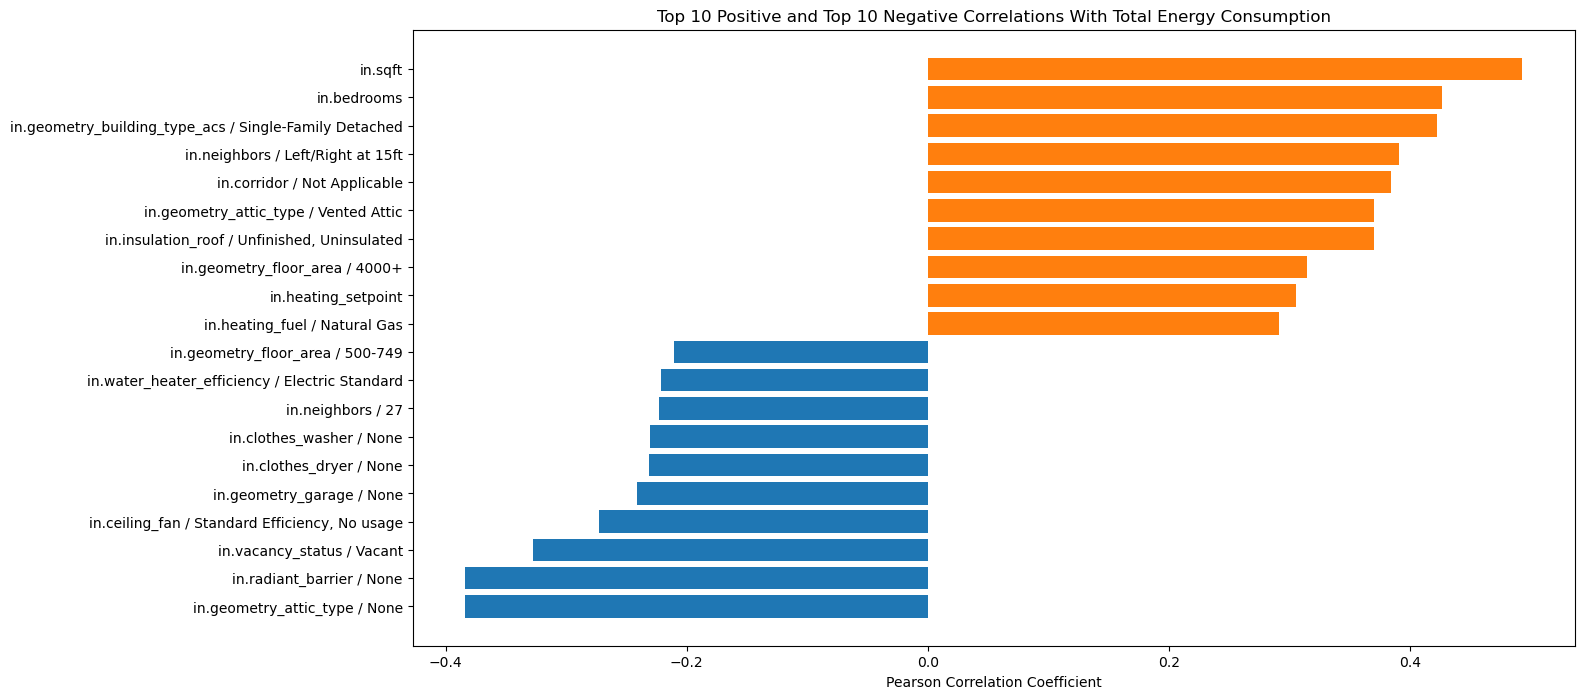

In [6]:
correlations = {df.columns[i]: np.corrcoef(df.iloc[:, 0], df.iloc[:, i])[0,1] for i in range(1, df.shape[1])}
correlations = dict(sorted(correlations.items(), key=lambda item: item[1]))
correlations_pos = [list(correlations.keys())[-10:], list(correlations.values())[-10:]]
correlations_neg = [list(correlations.keys())[:10], list(correlations.values())[:10]]

plt.figure(figsize=(15,8))
plt.barh(correlations_neg[0], correlations_neg[1], )
plt.barh(correlations_pos[0], correlations_pos[1])
plt.title('Top 10 Positive and Top 10 Negative Correlations With Total Energy Consumption')
plt.xlabel('Pearson Correlation Coefficient');

In [7]:
df_train, df_test = train_test_split(df, test_size=50000, random_state=0)
df_train80, df_val = train_test_split(df_train, test_size=50000, random_state=1)
columns = list(df.columns)
del df
print("Train / validation / test shapes:", df_train.shape, df_train80.shape, df_val.shape, df_test.shape)

Train / validation / test shapes: (498912, 334) (448912, 334) (50000, 334) (50000, 334)


In [8]:
X_train = df_train.drop(columns='total_consumption')
y_train = np.log(df_train['total_consumption'])
X_train80 = df_train80.drop(columns='total_consumption')
y_train80 = np.log(df_train80['total_consumption'])
X_val = df_val.drop(columns='total_consumption')
y_val = np.log(df_val['total_consumption'])
X_test = df_test.drop(columns='total_consumption')
y_test = np.log(df_test['total_consumption'])
del df_train, df_train80, df_val, df_test

In [9]:
def scale_columns(X, scaler, columns):
    X_columns = X.copy()[columns]
    X[columns] = scaler.transform(X_columns)
    return X
nonbinary_cols = [col for col in X_train.columns if ' / ' not in col]
scaler = StandardScaler()
scaler.fit(X_train[nonbinary_cols])
X_train = scale_columns(X_train, scaler, nonbinary_cols)
X_train80 = scale_columns(X_train80, scaler, nonbinary_cols)
X_val = scale_columns(X_val, scaler, nonbinary_cols)
X_test = scale_columns(X_test, scaler, nonbinary_cols)

In [10]:
# Model results
mses_train = {}
r2s_train = {}
mses_test = {}
r2s_test = {}

## Baseline Model

In [11]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
mses_train['baseline'] = mean_squared_error(baseline.predict(X_train), y_train)
mses_test['baseline'] = mean_squared_error(baseline.predict(X_test), y_test)
r2s_train['baseline'] = baseline.score(X_train, y_train)
r2s_test['baseline'] = baseline.score(X_test, y_test)

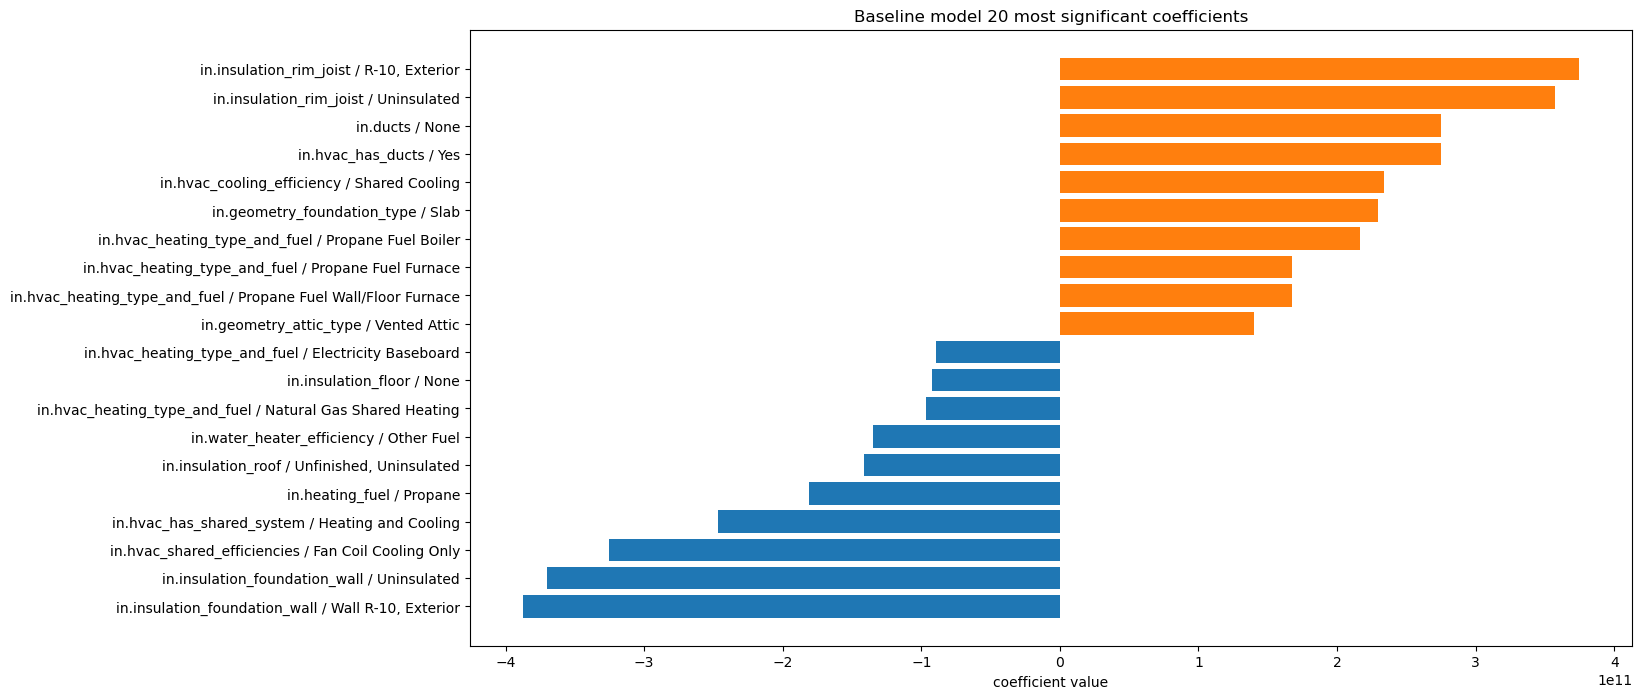

In [12]:
coefs = list(baseline.coef_)

# Sorted dictionary of all predictior and coefficients 
features = {X_train.columns[i]: coefs[i] for i in range(len(coefs))}
features = sorted(features.items(), key=operator.itemgetter(1), reverse = True)

# Top 20 most significant positive and negative features 
plt.figure(figsize=(15,8))
plt.barh([features[i][0] for i in range(-1, -11, -1)], [features[i][1] for i in range(-1, -11, -1)]);
plt.barh([features[i][0] for i in range(9, -1, -1)], [features[i][1] for i in range(9, -1, -1)])
plt.title('Baseline model 20 most significant coefficients')
plt.xlabel('coefficient value');

## Sparse Group Lasso

In [13]:
groups = [0]
group_names = [col.split(' / ')[0] if ' / ' in col else col for col in X_train.columns]

In [14]:
for i in range(1, len(group_names)):
    if group_names[i] == group_names[i-1]:
        groups.append(groups[i-1])
    else:
        groups.append(groups[i-1] + 1)
groups = np.array(groups)

In [15]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

t00 = time()
reg_coefs = [0, 1e-5, 1e-4, 1e-3] #The regularisation coefficient for the coefficient sparsity penalty
gl_val_r2s, gl_train_r2s = [], []
gl_val_mses, gl_train_mses = [], []
for coef in reg_coefs:

    gl = GroupLasso(
        groups = groups,
        group_reg = 0.05, 
        l1_reg = coef,
        frobenius_lipschitz = True,
        scale_reg = "inverse_group_size",
        subsampling_scheme = 1,
        supress_warning = True,
        n_iter = 100,
        tol = 1e-5,
    )
    gl.fit(X_train80, y_train80)
    
    # Compute validation performance metrics
    gl_val_r2s.append(r2_score(y_val, gl.predict(X_val)))
    gl_val_mses.append(mean_squared_error(y_val, gl.predict(X_val)))
    
        
    # Compute train performance metrics
    gl_train_r2s.append(r2_score(y_train80,gl.predict(X_train80)))
    gl_train_mses.append(mean_squared_error(y_train80, gl.predict(X_train80)))
print(f'Total time: {round(time()-t00, 1)}s')

Total time: 255.2s


In [16]:
# find the best parameter
min_val_mse = min(gl_val_mses)
best_reg_coef = reg_coefs[gl_val_mses.index(min_val_mse)]
best_r2 = gl_val_r2s[gl_val_mses.index(min_val_mse)]
print(f'Best validation Group Lasso R^2 is {best_r2:.3}, best regularization coefficient is {best_reg_coef}')

Best validation Group Lasso R^2 is 0.589, best regularization coefficient is 0


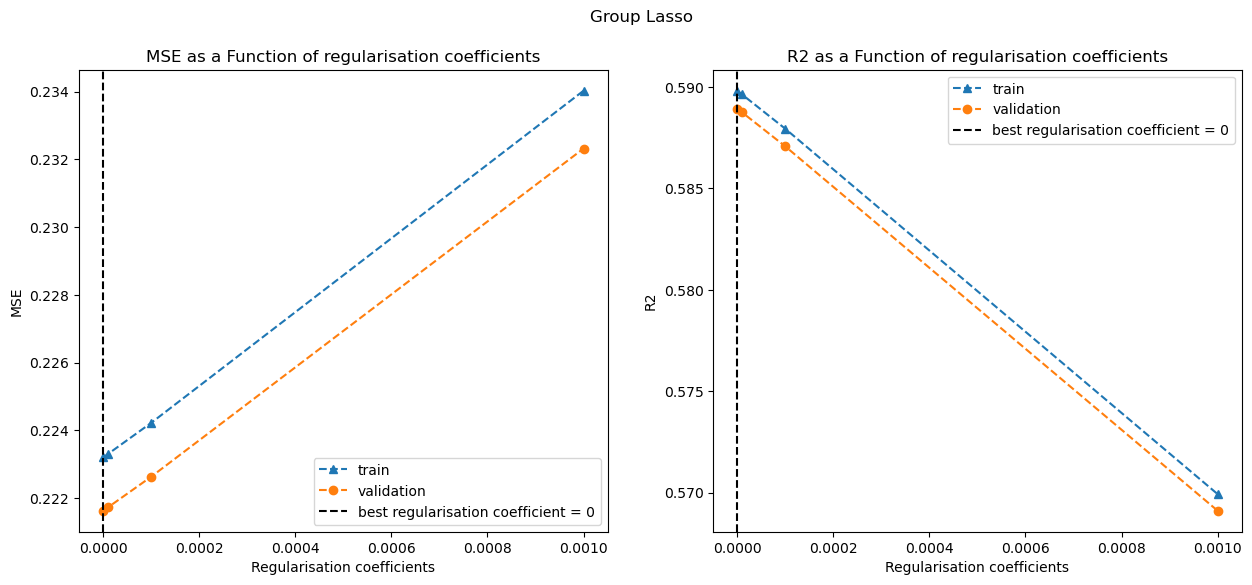

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Group Lasso')

ax[0].plot(reg_coefs, gl_train_mses,"^--", label='train')
ax[0].plot(reg_coefs, gl_val_mses,"o--", label='validation')
ax[1].plot(reg_coefs, gl_train_r2s,"^--", label='train')
ax[1].plot(reg_coefs, gl_val_r2s,"o--", label='validation')

ax[0].set_title('MSE as a Function of regularisation coefficients')
ax[1].set_title('R2 as a Function of regularisation coefficients')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('Regularisation coefficients')
    ax[i].axvline(best_reg_coef, c='k', ls='--', label=f'best regularisation coefficient = {best_reg_coef}')
    ax[i].legend()

In [18]:
#Fit the model with best regularization coefficient on entire train set 
gl = GroupLasso(
    groups = groups,
    group_reg = 0.05, 
    l1_reg = best_reg_coef,
    frobenius_lipschitz = True,
    scale_reg = "inverse_group_size",
    subsampling_scheme = 1,
    supress_warning = True,
    n_iter = 100,
    tol = 1e-5,
    )
gl.fit(X_train, y_train);

In [19]:
# Extract info from estimator
yhat_test = gl.predict(X_test)
yhat_train = gl.predict(X_train)
sparsity_mask = gl.sparsity_mask_

# Compute performance metrics
R2_test = r2_score(y_test, yhat_test)
test_mse = mean_squared_error(y_test, yhat_test)
R2_train = r2_score(y_train, yhat_train)
train_mse = mean_squared_error(y_train, yhat_train)

# Print results
print(f"Initial number of variables: {len(sparsity_mask)}")
print(f"Number of chosen variables by Group Lasso: {sparsity_mask.sum()}")
print(f"Test R^2: {R2_test:.3}")
print(f"Test MSE: {test_mse:.3}")

Initial number of variables: 333
Number of chosen variables by Group Lasso: 124
Test R^2: 0.589
Test MSE: 0.226


In [20]:
mses_train['GroupLasso'] = train_mse
mses_test['GroupLasso'] = test_mse
r2s_train['GroupLasso'] = R2_train
r2s_test['GroupLasso'] = R2_test

## Lasso-Transformed Ridge

In [21]:
t00 = time()
#Transform X
X_gl_train = gl.transform(X_train80)
X_gl_val = gl.transform(X_val)

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# List to store training errors
training_error = []
# List to store validation errors
validation_error = []
# List to store validation and train R^2
ridge_train_r2s, ridge_val_r2s = [], [] 

fit_intercept = True

for i, alpha in enumerate(alphas):
    
    # For each i, fit a ridge regression on Lasso-transformed training set
    ridge_reg = Ridge(fit_intercept=fit_intercept, 
                      alpha=alpha
                     )
    ridge_reg.fit(X_gl_train, y_train80)

    # Predict on the train and validation set 
    y_train_pred = ridge_reg.predict(X_gl_train)
    y_val_pred = ridge_reg.predict(X_gl_val)
    
    # Compute the training and validation MSE
    training_error.append(mean_squared_error(y_train80, y_train_pred))
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    # Compute the training and validation R^2
    ridge_train_r2s.append(ridge_reg.score(X_gl_train, y_train80))
    ridge_val_r2s.append(ridge_reg.score(X_gl_val, y_val))
print(f'Total time: {round(time()-t00, 1)}s')

Total time: 5.3s


In [22]:
# find the best parameter
best_alpha = alphas[validation_error.index(min(validation_error))]
print(f"Best alpha value is: {best_alpha}")

Best alpha value is: 1e-05


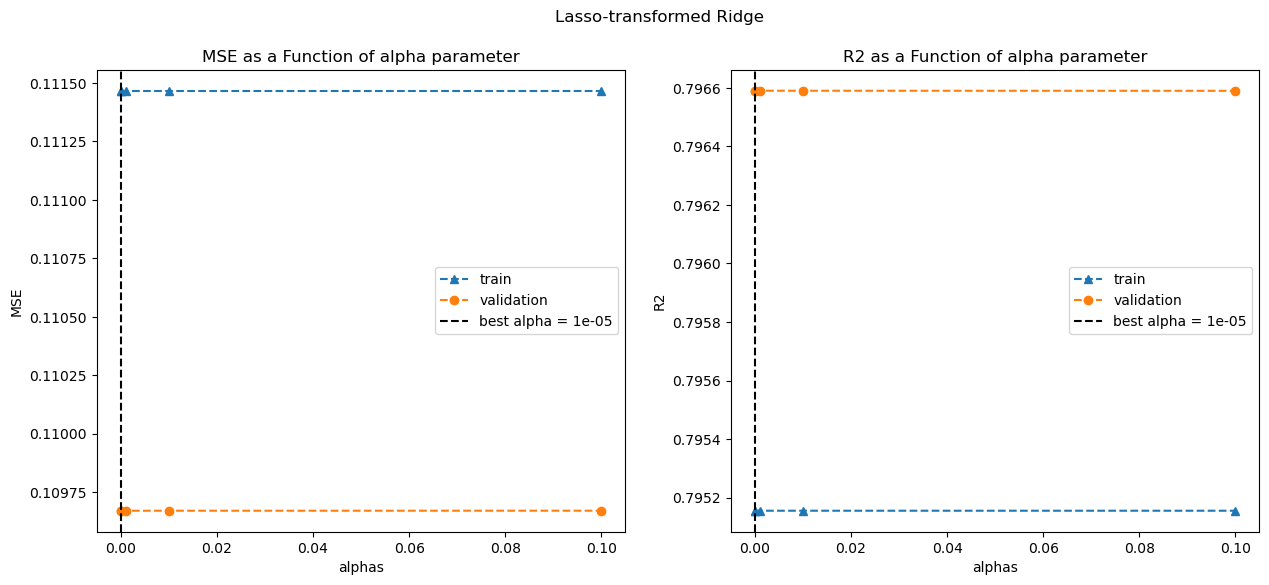

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Lasso-transformed Ridge')

ax[0].plot(alphas, training_error,"^--", label='train')
ax[0].plot(alphas, validation_error,"o--", label='validation')
ax[1].plot(alphas, ridge_train_r2s,"^--", label='train')
ax[1].plot(alphas, ridge_val_r2s,"o--", label='validation')

ax[0].set_title('MSE as a Function of alpha parameter')
ax[1].set_title('R2 as a Function of alpha parameter')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('alphas')
    ax[i].axvline(best_alpha, c='k', ls='--', label=f'best alpha = {best_alpha}')
    ax[i].legend()

In [24]:
# Fit final Ridge model on a full train set
X_gl_train = gl.transform(X_train)
X_gl_test = gl.transform(X_test)
final_ridge_model = Ridge(alpha=best_alpha).fit(X_gl_train, y_train)

In [25]:
# Compute final Ridge performance
y_test_pred = final_ridge_model.predict(X_gl_test)
y_train_pred = final_ridge_model.predict(X_gl_train)

# Compute performance metrics
R2_test = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f'Lasso-transformed Ridge R^2 test score = {R2_test:.3}')

mses_train['Lasso-transformed Ridge'] = train_mse
mses_test['Lasso-transformed Ridge'] = test_mse
r2s_train['Lasso-transformed Ridge'] = R2_train
r2s_test['Lasso-transformed Ridge'] = R2_test

Lasso-transformed Ridge R^2 test score = 0.797


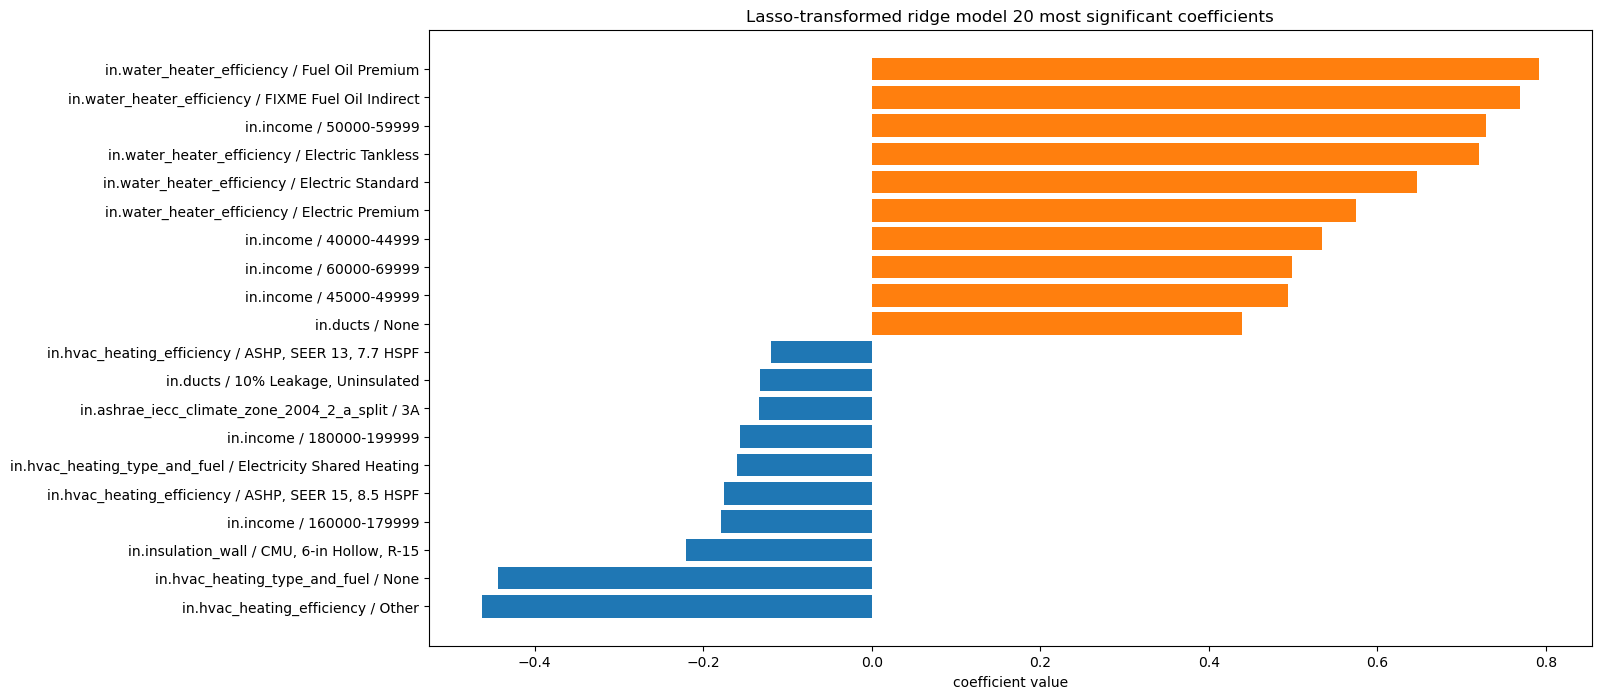

In [26]:
coefs = list(final_ridge_model.coef_)

# Sorted dictionary of all predictior and coefficients 
features = {X_train.columns[i]: coefs[i] for i in range(len(coefs))}
features = sorted(features.items(), key=operator.itemgetter(1), reverse = True)

# Top 20 most significant positive and negative features 
plt.figure(figsize=(15,8))
plt.barh([features[i][0] for i in range(-1, -11, -1)], [features[i][1] for i in range(-1, -11, -1)]);
plt.barh([features[i][0] for i in range(9, -1, -1)], [features[i][1] for i in range(9, -1, -1)]);
plt.title('Lasso-transformed ridge model 20 most significant coefficients')
plt.xlabel('coefficient value');

## Decision Tree

In [27]:
depths = [d for d in range(1, 21)]
dt_mses_train = []
dt_mses_val = []
dt_r2s_train = []
dt_r2s_val = []

In [28]:
t00 = time()
for depth in depths:
    t0 = time()
    print(f'Maximum depth: {depth}', end='\t\t')
    dt = DecisionTreeRegressor(max_depth=depth).fit(X_train80, y_train80)
    dt_mses_train.append(mean_squared_error(dt.predict(X_train80), y_train80))
    dt_mses_val.append(mean_squared_error(dt.predict(X_val), y_val))
    dt_r2s_train.append(dt.score(X_train80, y_train80))
    dt_r2s_val.append(dt.score(X_val, y_val))
    print(f'Train MSE = {dt_mses_train[-1]:.6f}, R2 = {dt_r2s_train[-1]:.6f}', end='\t')
    print(f'Validation MSE = {dt_mses_val[-1]:.6f}, R2 = {dt_r2s_val[-1]:.6f}', end='\t')
    print(f'Time: {round(time()-t0, 1)}s')
print(f'Total time: {round(time()-t00, 1)}s')

Maximum depth: 1		Train MSE = 0.398547, R2 = 0.267584	Validation MSE = 0.394770, R2 = 0.267802	Time: 2.7s
Maximum depth: 2		Train MSE = 0.283410, R2 = 0.479172	Validation MSE = 0.281049, R2 = 0.478727	Time: 3.6s
Maximum depth: 3		Train MSE = 0.248700, R2 = 0.542959	Validation MSE = 0.247204, R2 = 0.541499	Time: 4.7s
Maximum depth: 4		Train MSE = 0.215891, R2 = 0.603254	Validation MSE = 0.216305, R2 = 0.598810	Time: 6.0s
Maximum depth: 5		Train MSE = 0.189026, R2 = 0.652624	Validation MSE = 0.190404, R2 = 0.646849	Time: 7.3s
Maximum depth: 6		Train MSE = 0.166829, R2 = 0.693416	Validation MSE = 0.167364, R2 = 0.689582	Time: 8.7s
Maximum depth: 7		Train MSE = 0.148010, R2 = 0.727999	Validation MSE = 0.148784, R2 = 0.724044	Time: 10.1s
Maximum depth: 8		Train MSE = 0.131817, R2 = 0.757758	Validation MSE = 0.132646, R2 = 0.753976	Time: 11.9s
Maximum depth: 9		Train MSE = 0.118377, R2 = 0.782457	Validation MSE = 0.120434, R2 = 0.776626	Time: 14.1s
Maximum depth: 10		Train MSE = 0.106878, R2

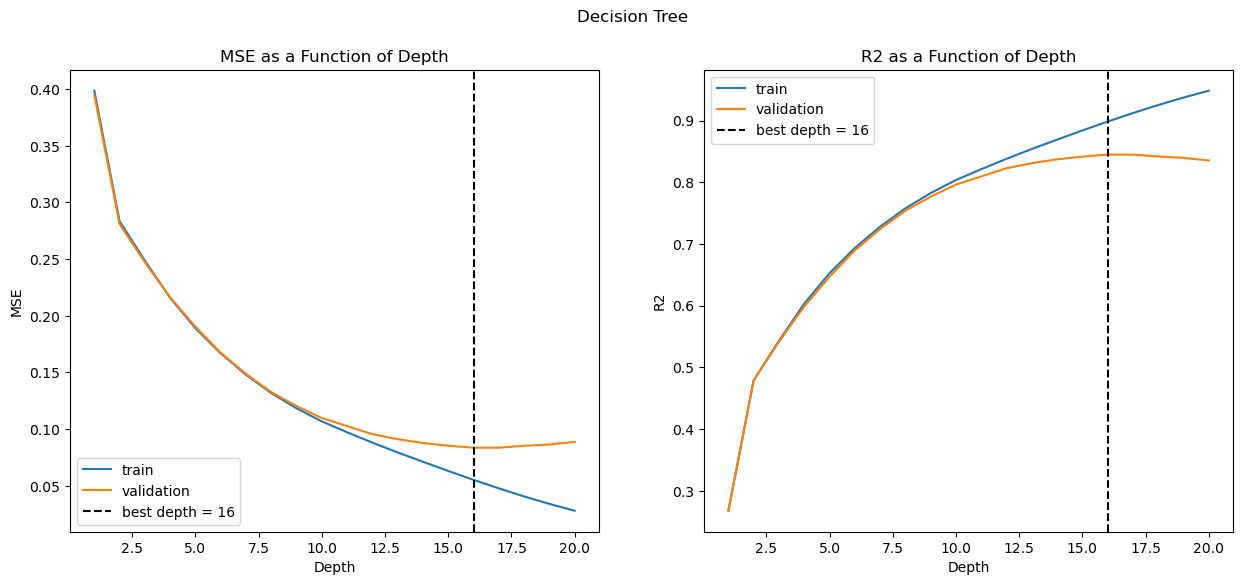

In [29]:
dt_best_depth = depths[np.argmax(np.array(dt_r2s_val))]

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Decision Tree')

ax[0].plot(depths, dt_mses_train, label='train')
ax[0].plot(depths, dt_mses_val, label='validation')
ax[1].plot(depths, dt_r2s_train, label='train')
ax[1].plot(depths, dt_r2s_val, label='validation')

ax[0].set_title('MSE as a Function of Depth')
ax[1].set_title('R2 as a Function of Depth')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('Depth')
    ax[i].axvline(dt_best_depth, c='k', ls='--', label=f'best depth = {dt_best_depth}')
    ax[i].legend()

In [30]:
# Retrain on the whole train data with the best maximum depth
time0 = time()
dt = DecisionTreeRegressor(max_depth=dt_best_depth)
dt.fit(X_train, y_train)
print(f'Time: {round(time()-time0, 1)}s')

Time: 23.9s


In [31]:
mses_train['dt'] = mean_squared_error(dt.predict(X_train), y_train)
mses_test['dt'] = mean_squared_error(dt.predict(X_test), y_test)
r2s_train['dt'] = dt.score(X_train, y_train)
r2s_test['dt'] = dt.score(X_test, y_test)

## Bagging

In [32]:
n_jobs = multiprocessing.cpu_count() - 2 # it crashes with more
print('Number of cores used:', n_jobs)

Number of cores used: 10


In [33]:
t00 = time()
iterations = [i*n_jobs for i in range(1, 5)] # was not run further in the final version due to memory limitations
bagging_mses_train = []
bagging_mses_val = []
bagging_r2s_train = []
bagging_r2s_val = []
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=100), n_estimators=n_jobs, n_jobs=n_jobs, warm_start=True)
for i in iterations:
    t0 = time()
    print(f'{i} iterations:', end='\t\t')
    bagging.fit(X_train80, y_train80)
    bagging_mses_train.append(mean_squared_error(bagging.predict(X_train80), y_train80))
    bagging_mses_val.append(mean_squared_error(bagging.predict(X_val), y_val))
    bagging_r2s_train.append(bagging.score(X_train80, y_train80))
    bagging_r2s_val.append(bagging.score(X_val, y_val))
    print(f'Train MSE = {bagging_mses_train[-1]:.6f}, R2 = {bagging_r2s_train[-1]:.6f}', end='\t')
    print(f'Validation MSE = {bagging_mses_val[-1]:.6f}, R2 = {bagging_r2s_val[-1]:.6f}', end='\t')
    bagging.n_estimators += n_jobs
    print(f'Time: {round(time()-t0, 1)}s')
print(f'Total time: {round(time()-t00, 1)}s')

10 iterations:		Train MSE = 0.010003, R2 = 0.981617	Validation MSE = 0.053920, R2 = 0.899993	Time: 74.9s
20 iterations:		Train MSE = 0.008150, R2 = 0.985023	Validation MSE = 0.049860, R2 = 0.907523	Time: 90.1s
30 iterations:		Train MSE = 0.007563, R2 = 0.986102	Validation MSE = 0.048824, R2 = 0.909445	Time: 103.4s
40 iterations:		Train MSE = 0.007237, R2 = 0.986700	Validation MSE = 0.048118, R2 = 0.910753	Time: 125.5s
Total time: 393.9s


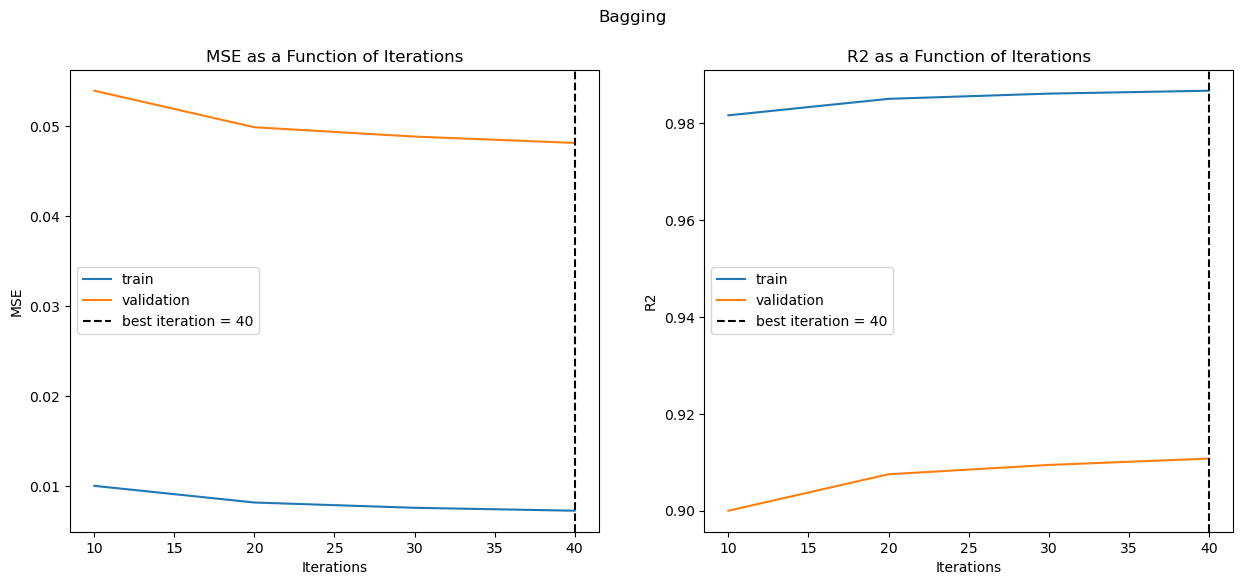

In [34]:
bagging_best_i = iterations[np.argmax(np.array(bagging_r2s_val))]

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Bagging')

ax[0].plot(iterations, bagging_mses_train, label='train')
ax[0].plot(iterations, bagging_mses_val, label='validation')
ax[1].plot(iterations, bagging_r2s_train, label='train')
ax[1].plot(iterations, bagging_r2s_val, label='validation')

ax[0].set_title('MSE as a Function of Iterations')
ax[1].set_title('R2 as a Function of Iterations')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('Iterations')
    ax[i].axvline(bagging_best_i, c='k', ls='--', label=f'best iteration = {bagging_best_i}')
    ax[i].legend()

In [35]:
# Retrain on the whole train data with the best number of iterations
time0 = time()
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=100), n_estimators=bagging_best_i, n_jobs=n_jobs)
bagging.fit(X_train, y_train)
print(f'Time: {round(time()-time0, 1)}s')

Time: 256.6s


In [36]:
mses_train['bagging'] = mean_squared_error(bagging.predict(X_train), y_train)
mses_test['bagging'] = mean_squared_error(bagging.predict(X_test), y_test)
r2s_train['bagging'] = bagging.score(X_train, y_train)
r2s_test['bagging'] = bagging.score(X_test, y_test)

## Random Forest

In [37]:
n_jobs = multiprocessing.cpu_count()
print('Number of cores used:', n_jobs)

Number of cores used: 12


In [38]:
t00 = time()
iterations = [i*n_jobs for i in range(1, 31)]
rf_mses_train = []
rf_mses_val = []
rf_r2s_train = []
rf_r2s_val = []
rf = RandomForestRegressor(n_estimators=n_jobs, max_depth=100, max_features=1/3, n_jobs=n_jobs, warm_start=True)
for i in iterations:
    t0 = time()
    print(f'{i} iterations:', end='\t\t')
    rf.fit(X_train80, y_train80)
    rf_mses_train.append(mean_squared_error(rf.predict(X_train80), y_train80))
    rf_mses_val.append(mean_squared_error(rf.predict(X_val), y_val))
    rf_r2s_train.append(rf.score(X_train80, y_train80))
    rf_r2s_val.append(rf.score(X_val, y_val))
    print(f'Train MSE = {rf_mses_train[-1]:.6f}, R2 = {rf_r2s_train[-1]:.6f}', end='\t')
    print(f'Validation MSE = {rf_mses_val[-1]:.6f}, R2 = {rf_r2s_val[-1]:.6f}', end='\t')
    rf.n_estimators += n_jobs
    print(f'Time: {round(time()-t0, 1)}s')
print(f'Total time: {round(time()-t00, 1)}s')

12 iterations:		Train MSE = 0.009544, R2 = 0.982460	Validation MSE = 0.051699, R2 = 0.904112	Time: 26.2s
24 iterations:		Train MSE = 0.007770, R2 = 0.985721	Validation MSE = 0.047875, R2 = 0.911204	Time: 26.7s
36 iterations:		Train MSE = 0.007221, R2 = 0.986730	Validation MSE = 0.046757, R2 = 0.913277	Time: 28.3s
48 iterations:		Train MSE = 0.006937, R2 = 0.987251	Validation MSE = 0.046199, R2 = 0.914313	Time: 29.9s
60 iterations:		Train MSE = 0.006783, R2 = 0.987534	Validation MSE = 0.045979, R2 = 0.914720	Time: 31.4s
72 iterations:		Train MSE = 0.006668, R2 = 0.987745	Validation MSE = 0.045721, R2 = 0.915200	Time: 32.9s
84 iterations:		Train MSE = 0.006585, R2 = 0.987899	Validation MSE = 0.045619, R2 = 0.915388	Time: 34.1s
96 iterations:		Train MSE = 0.006519, R2 = 0.988021	Validation MSE = 0.045475, R2 = 0.915655	Time: 35.7s
108 iterations:		Train MSE = 0.006470, R2 = 0.988109	Validation MSE = 0.045359, R2 = 0.915871	Time: 37.4s
120 iterations:		Train MSE = 0.006440, R2 = 0.988166	V

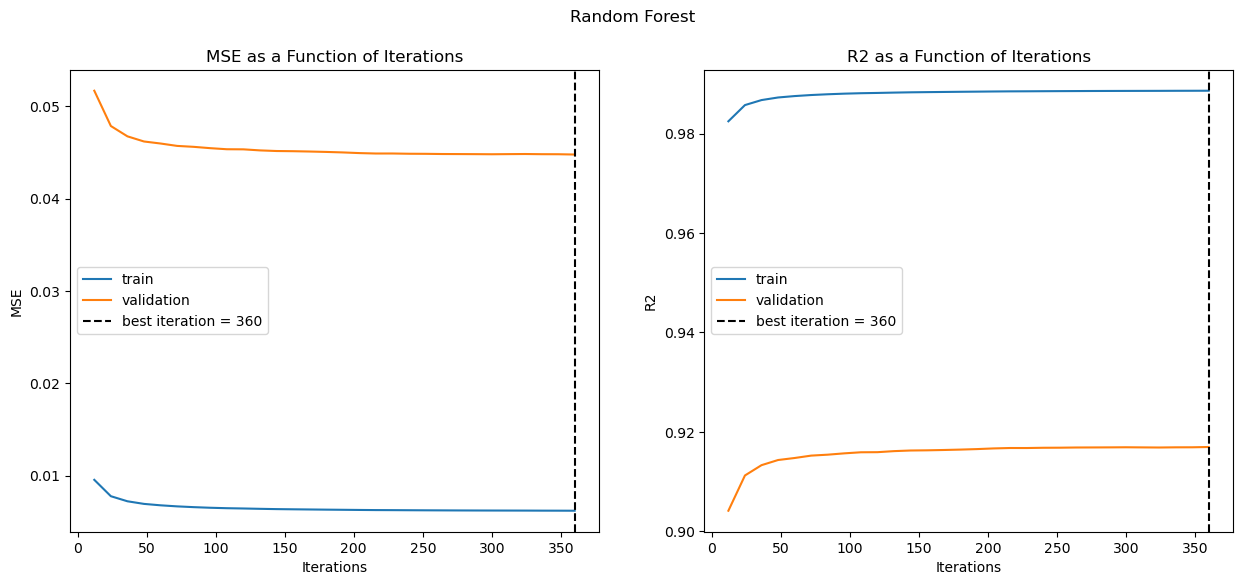

In [39]:
rf_best_i = iterations[np.argmax(np.array(rf_r2s_val))]

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Random Forest')

ax[0].plot(iterations, rf_mses_train, label='train')
ax[0].plot(iterations, rf_mses_val, label='validation')
ax[1].plot(iterations, rf_r2s_train, label='train')
ax[1].plot(iterations, rf_r2s_val, label='validation')

ax[0].set_title('MSE as a Function of Iterations')
ax[1].set_title('R2 as a Function of Iterations')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('Iterations')
    ax[i].axvline(rf_best_i, c='k', ls='--', label=f'best iteration = {rf_best_i}')
    ax[i].legend()

In [40]:
# Retrain on the whole train data with the best number of iterations
time0 = time()
rf = RandomForestRegressor(n_estimators=rf_best_i, max_depth=100, max_features=1/3, n_jobs=n_jobs)
rf.fit(X_train, y_train)
print(f'Time: {round(time()-time0, 1)}s')

Time: 780.7s


In [41]:
mses_train['rf'] = mean_squared_error(rf.predict(X_train), y_train)
mses_test['rf'] = mean_squared_error(rf.predict(X_test), y_test)
r2s_train['rf'] = rf.score(X_train, y_train)
r2s_test['rf'] = rf.score(X_test, y_test)

## Gradient Boosting

In [42]:
# Histogram-based version is used to speed up the process
t00 = time()
depths = [d for d in range(1, 5)]
iterations = [i for i in range(1, 10001)]
hgb_best_iters = []
hgb_best_mses_train = []
hgb_best_mses_val = []
hgb_best_r2s_train = []
hgb_best_r2s_val = []

hgb_mses_train = np.zeros((max(iterations), max(depths)))
hgb_mses_val = np.zeros((max(iterations), max(depths)))
hgb_r2s_train = np.zeros((max(iterations), max(depths)))
hgb_r2s_val = np.zeros((max(iterations), max(depths)))

for depth in depths:
    t0 = time()
    print(f'Max depth = {depth}:', end='\t\t')
    hgb = HistGradientBoostingRegressor(learning_rate=0.5, max_iter=max(iterations), max_leaf_nodes=None, max_depth=depth, min_samples_leaf=1, early_stopping=False)
    hgb.fit(X_train80, y_train80)

    st_preds_train = hgb.staged_predict(X_train80)
    st_preds_val = hgb.staged_predict(X_val)
    
    mse_r2_train = [(mean_squared_error(pred, y_train80), r2_score(pred, y_train80)) for pred in st_preds_train]
    mse_r2_val = [(mean_squared_error(pred, y_val), r2_score(pred, y_val)) for pred in st_preds_val]
    
    hgb_mses_train[:, depth-1] = np.array([mr[0] for mr in mse_r2_train])
    hgb_mses_val[:, depth-1] = np.array([mr[0] for mr in mse_r2_val])
    hgb_r2s_train[:, depth-1] = np.array([mr[1] for mr in mse_r2_train])
    hgb_r2s_val[:, depth-1] = np.array([mr[1] for mr in mse_r2_val])
    
    hgb_best_iters.append(iterations[np.argmax(hgb_r2s_val[:, depth-1])])
    hgb_best_mses_train.append(min(hgb_mses_train[:, depth-1]))
    hgb_best_mses_val.append(min(hgb_mses_val[:, depth-1]))
    hgb_best_r2s_train.append(max(hgb_r2s_train[:, depth-1]))
    hgb_best_r2s_val.append(max(hgb_r2s_val[:, depth-1]))
    
    print(f'Best iteration: {hgb_best_iters[-1]}, Validation MSE = {hgb_best_mses_val[-1]:.6f}, R2 = {hgb_best_r2s_val[-1]:.6f}', end='\t')
    print(f'Time: {round(time()-t0, 1)}s')
print(f'Total time: {round(time()-t00, 1)}s')

Max depth = 1:		Best iteration: 9965, Validation MSE = 0.055378, R2 = 0.885375	Time: 552.4s
Max depth = 2:		Best iteration: 10000, Validation MSE = 0.023626, R2 = 0.954045	Time: 673.1s
Max depth = 3:		Best iteration: 9590, Validation MSE = 0.021133, R2 = 0.959457	Time: 1018.0s
Max depth = 4:		Best iteration: 3660, Validation MSE = 0.022516, R2 = 0.957013	Time: 1315.7s
Total time: 3559.2s


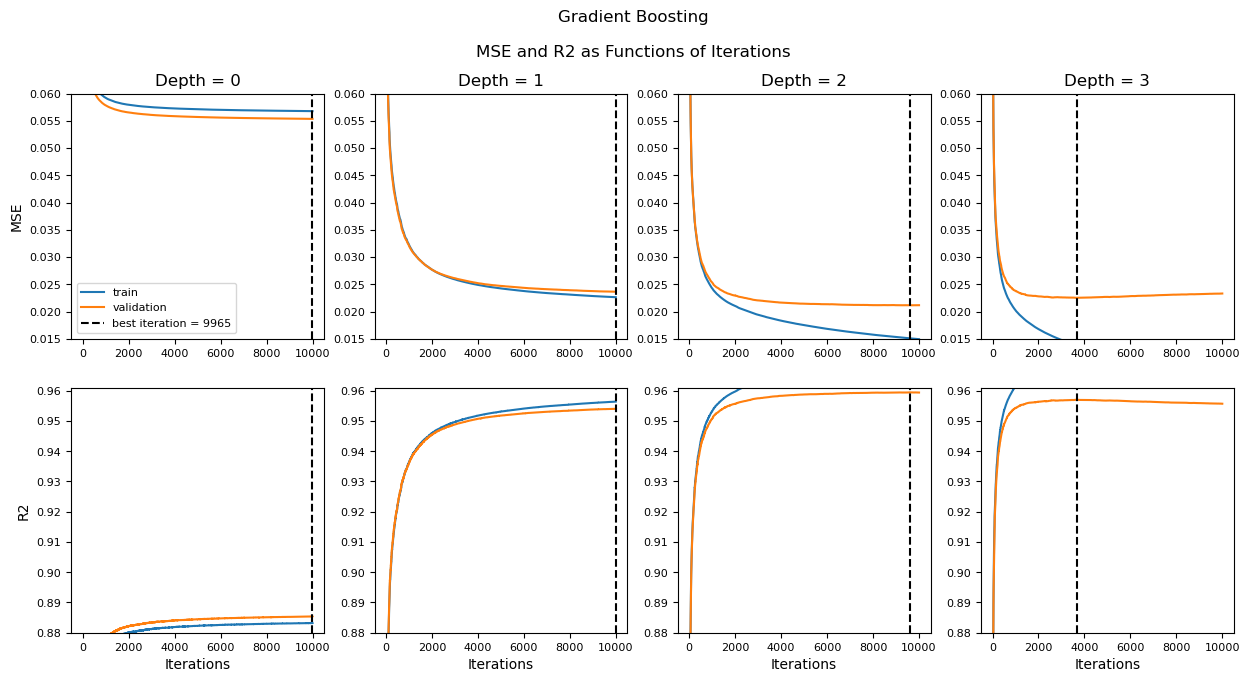

In [52]:
fig, ax = plt.subplots(2, max(depths), figsize=(15,7))
fig.suptitle('Gradient Boosting\n\nMSE and R2 as Functions of Iterations', y=1)

for i in range(max(depths)):
    ax[0,i].plot(iterations, hgb_mses_train[:, i], label='train')
    ax[0,i].plot(iterations, hgb_mses_val[:, i], label='validation')
    ax[1,i].plot(iterations, hgb_r2s_train[:, i], label='train')
    ax[1,i].plot(iterations, hgb_r2s_val[:, i], label='validation')
    ax[0,i].set_title(f'Depth = {i}')
    ax[0,i].set_ylim((0.015, 0.06))
    ax[1,i].set_ylim((0.88, 0.961))
    ax[0,0].set_ylabel('MSE')
    ax[1,0].set_ylabel('R2')
    ax[1,i].set_xlabel('Iterations')
    for j in range(2):
        ax[j,i].axvline(hgb_best_iters[i], c='k', ls='--', label=f'best iteration = {hgb_best_iters[i]}')
        ax[j,i].tick_params(axis='both', which='major', labelsize=8)
ax[0,0].legend(fontsize=8);

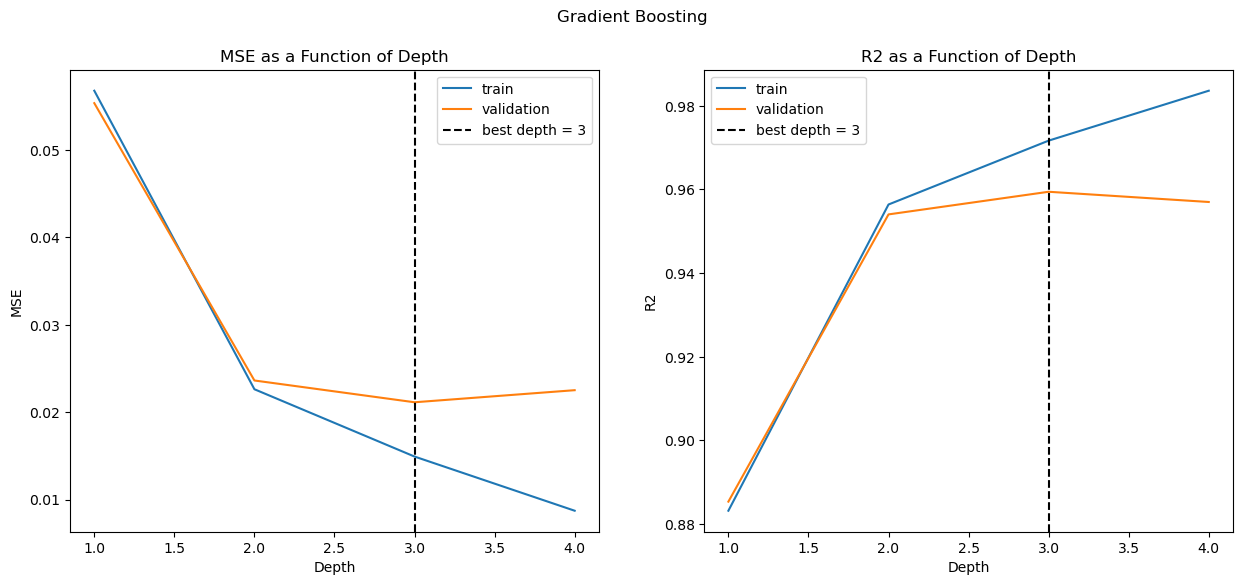

In [48]:
hgb_best_d = depths[np.argmax(np.array(hgb_best_r2s_val))]

fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Gradient Boosting')

ax[0].plot(depths, hgb_best_mses_train, label='train')
ax[0].plot(depths, hgb_best_mses_val, label='validation')
ax[1].plot(depths, hgb_best_r2s_train, label='train')
ax[1].plot(depths, hgb_best_r2s_val, label='validation')

ax[0].set_title('MSE as a Function of Depth')
ax[1].set_title('R2 as a Function of Depth')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')
for i in range(2):
    ax[i].set_xlabel('Depth')
    ax[i].axvline(hgb_best_d, c='k', ls='--', label=f'best depth = {hgb_best_d}')
    ax[i].legend()

In [45]:
# Retrain on the whole train data with the best number of iterations
time0 = time()
hgb = HistGradientBoostingRegressor(learning_rate=0.5, max_iter=hgb_best_iters[hgb_best_d-1], max_leaf_nodes=None, max_depth=hgb_best_d, min_samples_leaf=1, early_stopping=False)
hgb.fit(X_train, y_train)
print(f'Time: {round(time()-time0, 1)}s')

Time: 712.6s


In [46]:
mses_train['hgb'] = mean_squared_error(hgb.predict(X_train), y_train)
mses_test['hgb'] = mean_squared_error(hgb.predict(X_test), y_test)
r2s_train['hgb'] = hgb.score(X_train, y_train)
r2s_test['hgb'] = hgb.score(X_test, y_test)

## Results

In [47]:
results = [{k: f'{v:.6f}' for k,v in dic.items()} for dic in [mses_train, mses_test, r2s_train, r2s_test]]
results = pd.DataFrame.from_dict(results)
results.columns = ['Baseline (Linear)', 'Sparse Group Lasso', 'Lasso-Transformed Ridge', 'Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting']
results.index = ['Train MSEs', 'Test MSEs', 'Train R2 scores', 'Test R2 scores']
results.transpose()

,Train MSEs,Test MSEs,Train R2 scores,Test R2 scores
Baseline (Linear),0.059978,0.060445,0.889676,0.889771
Sparse Group Lasso,0.223060,0.225566,0.589702,0.588652
Lasso-Transformed Ridge,0.111284,0.111527,0.795304,0.796616
Decision Tree,0.056310,0.082202,0.896424,0.850095
Bagging,0.007135,0.047725,0.986876,0.912967
Random Forest,0.006102,0.044213,0.988776,0.919372
Gradient Boosting,0.015414,0.021367,0.971647,0.961035
